<a href="https://colab.research.google.com/github/sushirito/Molecular-Dynamics/blob/main/VErho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import os
import io

# Specify your target Google Drive folder path (change this to your folder)
drive_folder = '/content/drive/MyDrive/VErho/csv'
os.makedirs(drive_folder, exist_ok=True)

# Define the voltage data for the regular 2D sheet as a multiline string.
regular_data = """12.27	12.05	12.15	11.54	11.60	11.85	11.85	11.55	11.57	11.43	11.40	11.17	10.97	10.95	10.86	10.61	10.61	10.49	10.10	10.18	10.17	10.09	10.00	9.99	10.02	9.94
12.29	12.30	11.38	12.15	11.95	11.95	11.88	11.73	11.56	11.22	11.29	11.19	10.86	10.90	10.73	10.64	10.57	10.52	10.39	10.29	10.12	9.99	9.98	10.06	9.95	10.03
11.85	11.60	11.67	11.57	11.61	11.22	11.43	11.30	11.00	10.94	10.65	9.95	10.20	10.53	10.40	9.81	10.17	9.98	9.75	9.79	9.41	9.64	9.72	9.52	9.53	9.50
12.07	12.10	11.83	11.75	11.72	11.59	11.35	11.26	11.15	11.18	10.94	10.61	10.78	10.49	10.36	10.34	10.25	9.64	9.92	9.86	9.65	9.63	9.60	9.42	8.97	9.20
12.20	11.89	11.66	11.95	11.75	11.46	11.53	11.43	11.36	11.12	11.05	10.68	10.33	10.63	10.01	10.41	10.10	10.05	9.99	9.57	9.66	9.59	9.63	9.61	9.43	9.46
12.24	11.83	11.95	12.03	11.87	11.40	11.60	11.30	11.22	11.04	11.02	10.76	10.33	10.28	10.43	10.00	10.02	9.70	9.87	9.85	9.70	9.41	9.57	9.45	8.85	9.08
12.35	12.32	12.25	12.01	11.87	10.75	11.67	11.50	11.35	11.05	10.05	10.77	10.55	9.60	10.25	10.36	10.18	9.90	9.40	9.65	9.55	9.37	9.56	9.29	9.28	9.13
12.50	12.48	10.97	12.05	11.81	11.86	11.71	11.58	11.40	11.23	10.77	10.87	10.83	10.55	10.42	10.29	10.12	10.05	9.86	9.64	9.63	9.43	8.42	9.06	8.76	8.87
12.31	12.59	12.16	11.55	11.23	11.65	11.64	11.15	11.29	11.03	9.93	10.77	10.50	10.47	10.07	10.22	10.17	10.00	9.76	9.68	7.79	9.16	9.03	8.49	9.16	8.89
12.47	12.63	12.10	12.15	11.97	11.78	11.66	10.98	10.81	10.78	8.65	10.90	10.55	10.58	10.48	10.31	9.94	9.98	9.86	9.55	9.58	9.20	9.22	8.83	8.70	8.63
12.97	12.79	12.66	12.42	12.19	12.05	11.75	11.56	11.43	11.44	11.22	11.15	10.85	10.65	10.10	10.57	10.19	9.75	10.12	9.95	9.70	9.57	9.11	9.15	8.35	8.43
13.24	12.61	12.77	12.62	12.26	12.17	11.96	11.73	11.58	11.55	11.16	10.15	11.10	10.20	10.25	10.55	10.40	10.22	10.15	9.93	9.84	9.45	9.53	8.73	9.23	8.64
13.10	12.79	12.71	12.43	12.32	12.17	11.95	11.25	11.70	10.35	10.80	11.02	11.07	10.30	10.87	10.53	10.24	10.39	9.98	9.53	9.71	9.78	9.77	9.61	9.25	9.04
13.05	12.54	12.58	12.45	12.22	11.75	11.66	11.59	11.66	11.46	11.35	11.07	10.79	10.98	10.53	10.14	10.45	10.01	10.08	10.13	9.91	9.76	9.85	9.74	9.46	9.39
12.60	11.49	12.45	12.33	12.17	11.70	11.83	11.57	11.62	11.24	11.28	11.04	10.97	10.88	10.81	10.10	10.43	10.06	9.84	9.56	9.70	9.84	9.80	9.79	9.56	9.56
12.59	12.45	12.30	12.11	11.82	11.82	10.55	11.68	11.54	11.33	11.01	11.14	10.98	10.87	10.69	10.61	10.26	10.29	10.18	10.05	9.82	9.95	9.64	9.53	9.44	9.38
11.86	12.25	12.21	12.02	11.87	11.78	11.66	11.31	11.47	10.30	11.08	10.85	10.88	10.43	9.85	9.97	10.46	10.18	10.15	9.86	9.71	9.90	9.87	9.85	9.77	9.60
12.31	12.20	12.25	12.10	11.99	11.64	11.52	11.50	11.57	11.28	11.29	11.07	10.90	10.85	10.68	10.61	10.35	10.15	9.99	10.03	10.02	9.93	9.90	9.55	9.65	9.39
12.16	12.19	12.04	12.06	12.10	11.66	11.80	11.49	11.56	11.41	11.22	10.97	11.05	10.53	10.66	9.94	10.13	10.30	10.18	9.99	10.10	9.98	9.82	9.97	9.53	9.67
12.30	12.00	12.10	12.10	11.48	11.73	11.82	11.69	11.54	10.64	11.09	11.15	10.99	9.21	10.74	10.58	10.47	10.22	10.18	10.03	10.06	9.72	9.82	10.02	9.79	9.52
12.31	11.78	12.14	12.05	12.05	11.83	11.75	11.58	11.38	11.42	10.98	11.07	11.01	10.84	10.44	10.42	10.49	10.40	10.22	10.14	9.93	9.78	9.85	9.88	9.81	9.70"""

# Define the voltage data for the "gingerbread man" cutout.
ginger_data = """10.50	11.35	11.36	11.14	10.92	10.79	10.54	10.46	10.28	9.98	9.82	9.55	9.34	9.14	8.81	8.43	8.09	7.86	7.41	7.43	7.14	6.94	6.74	6.62	6.54	6.55
11.54	11.48	11.32	11.18	11.04	10.84	10.68	10.49	10.28	10.05	9.91	9.63	9.42	9.07	8.84	8.32	8.18	7.74	7.67	7.24	7.15	6.64	6.74	6.65	6.43	6.45
11.61	11.49	11.40	11.22	11.02	10.83	10.57	10.49	10.25	10.10	9.84	9.65	9.44	9.07	8.91	8.54	8.15	7.82	7.61	7.22	7.04	6.86	6.42	6.56	6.33	6.31
11.62	11.55	11.25	11.25	10.97	10.94	10.57	10.45	10.27	9.99	9.91	9.76	9.51	9.14	9.06	0.00	8.01	7.73	7.46	7.31	7.05	6.78	6.48	6.44	6.26	6.29
11.81	11.63	11.22	11.29	11.20	10.06	10.68	10.22	10.07	10.12	9.95	9.80	9.56	9.34	0.00	0.00	0.00	6.97	7.27	7.30	7.11	6.70	6.41	6.24	6.14	6.13
12.08	11.95	11.76	11.54	11.23	10.79	10.81	10.45	10.44	9.99	10.13	9.94	9.58	0.00	0.00	0.00	7.70	7.72	7.63	7.54	0.00	0.00	6.40	6.16	6.12	6.06
12.33	12.36	12.15	11.61	0.00	0.00	0.00	0.00	10.50	10.36	10.22	10.07	0.00	0.00	0.00	7.69	7.64	7.69	7.65	0.00	0.00	0.00	0.00	5.65	5.63	5.59
12.52	12.53	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.17	9.90	0.00	0.00	0.00	7.63	7.30	7.66	7.63	0.00	0.00	0.00	0.00	5.20	5.24	5.32	5.30
13.13	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	5.06	4.96	4.95	4.96
13.57	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	4.99	4.97	4.80	4.64	4.38
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.88	5.07	5.04	4.91	4.78	4.48	3.47
13.70	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.03	4.95	4.94	4.83	4.51	4.16
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.02	4.96	5.03	4.77	4.62
12.96	12.96	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.19	0.00	0.00	0.00	7.68	7.62	7.69	7.77	7.76	0.00	0.00	0.00	0.00	5.15	5.13	5.09	5.00
12.51	12.58	12.32	0.00	0.00	0.00	0.00	0.00	10.39	10.47	10.34	0.00	0.00	0.00	7.80	7.82	7.70	7.68	7.68	0.00	0.00	0.00	0.00	5.52	5.47	5.46
12.54	12.15	12.02	11.23	11.24	11.14	10.64	10.67	10.54	10.32	10.16	10.16	0.00	0.00	0.00	7.71	7.82	7.77	7.56	7.57	0.00	0.00	6.17	5.94	5.84	5.84
12.24	12.14	11.93	11.56	11.35	11.21	11.00	10.70	10.52	10.36	10.20	10.05	9.76	0.00	0.00	0.00	9.75	9.81	7.62	7.23	7.29	6.06	6.44	5.86	6.15	6.01
12.08	11.99	11.08	11.65	11.42	11.09	10.90	10.77	10.47	10.26	10.07	9.89	9.64	9.43	0.00	8.22	8.10	7.53	7.57	7.42	7.16	6.90	6.69	6.55	6.38	6.22
11.41	11.38	11.32	11.23	10.97	10.85	10.61	10.37	10.42	10.34	10.13	9.75	9.77	9.58	9.21	9.03	8.82	8.51	8.49	8.33	8.11	8.00	7.81	7.70	7.59	7.53
11.38	11.39	11.21	11.19	10.96	10.82	10.73	10.47	10.46	10.21	10.14	9.96	9.93	9.41	9.31	8.95	8.82	8.62	8.48	8.27	8.02	7.97	7.87	7.74	7.68	7.62
11.17	11.27	11.25	11.11	10.91	10.90	9.96	10.35	10.46	10.24	10.12	9.93	9.59	9.38	9.30	8.92	8.86	8.60	8.42	8.32	8.14	8.02	7.88	7.78	7.74	7.68"""

# Convert the multiline strings into DataFrames
df_regular = pd.read_csv(io.StringIO(regular_data), sep='\t', header=None)
df_ginger = pd.read_csv(io.StringIO(ginger_data), sep='\t', header=None)

# Save the DataFrames as CSV files into the specified Google Drive folder
df_regular.to_csv(os.path.join(drive_folder, 'regular_sheet.csv'), index=False, header=False)
df_ginger.to_csv(os.path.join(drive_folder, 'gingerbread_man.csv'), index=False, header=False)

print("CSV files have been saved to:", drive_folder)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV files have been saved to: /content/drive/MyDrive/VErho/csv


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CSV files have been saved to: /content/drive/MyDrive/VErho/csv


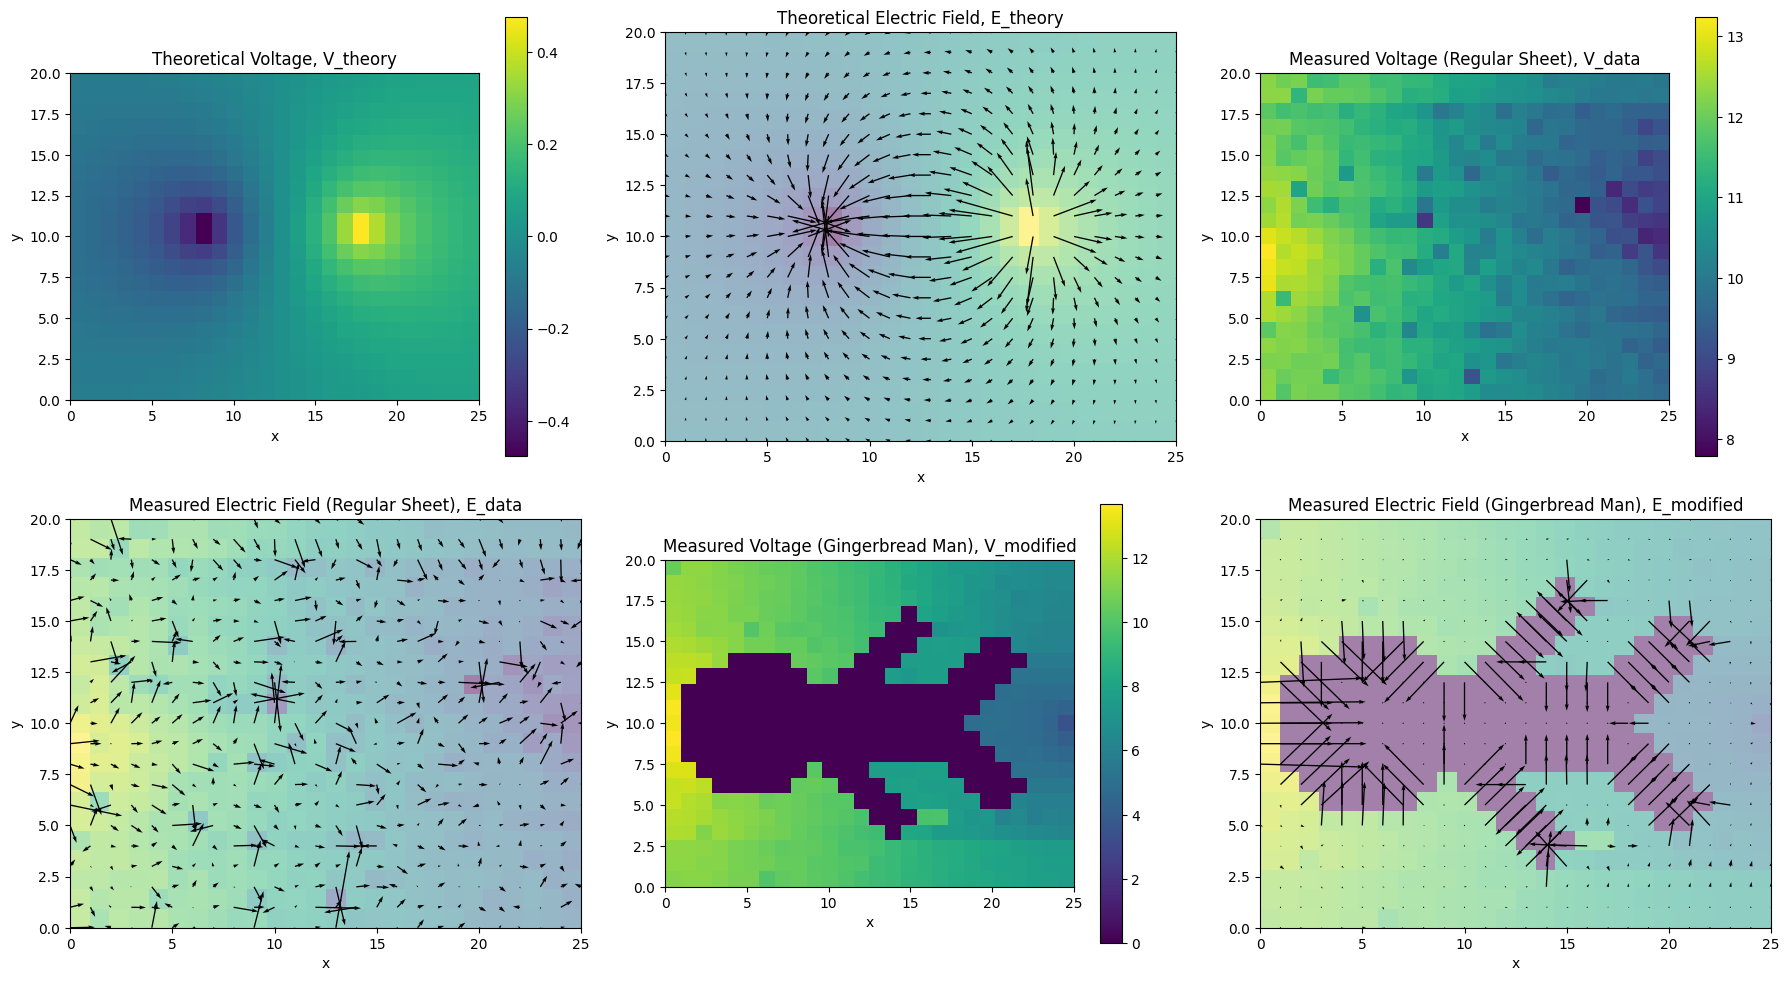

Plots have been saved to: /content/drive/MyDrive/VErho/plots


In [3]:
# Mount Google Drive and set up folder structure
from google.colab import drive
drive.mount('/content/drive')

import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define organized folder structure on Google Drive
base_folder = '/content/drive/MyDrive/VErho'
csv_folder = os.path.join(base_folder, 'csv')
plots_folder = os.path.join(base_folder, 'plots')
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)

# --- CSV Loading ---
# (The data strings are retranscribed completely)
regular_data = """12.27	12.05	12.15	11.54	11.60	11.85	11.85	11.55	11.57	11.43	11.40	11.17	10.97	10.95	10.86	10.61	10.61	10.49	10.10	10.18	10.17	10.09	10.00	9.99	10.02	9.94
12.29	12.30	11.38	12.15	11.95	11.95	11.88	11.73	11.56	11.22	11.29	11.19	10.86	10.90	10.73	10.64	10.57	10.52	10.39	10.29	10.12	9.99	9.98	10.06	9.95	10.03
11.85	11.60	11.67	11.57	11.61	11.22	11.43	11.30	11.00	10.94	10.65	9.95	10.20	10.53	10.40	9.81	10.17	9.98	9.75	9.79	9.41	9.64	9.72	9.52	9.53	9.50
12.07	12.10	11.83	11.75	11.72	11.59	11.35	11.26	11.15	11.18	10.94	10.61	10.78	10.49	10.36	10.34	10.25	9.64	9.92	9.86	9.65	9.63	9.60	9.42	8.97	9.20
12.20	11.89	11.66	11.95	11.75	11.46	11.53	11.43	11.36	11.12	11.05	10.68	10.33	10.63	10.01	10.41	10.10	10.05	9.99	9.57	9.66	9.59	9.63	9.61	9.43	9.46
12.24	11.83	11.95	12.03	11.87	11.40	11.60	11.30	11.22	11.04	11.02	10.76	10.33	10.28	10.43	10.00	10.02	9.70	9.87	9.85	9.70	9.41	9.57	9.45	8.85	9.08
12.35	12.32	12.25	12.01	11.87	10.75	11.67	11.50	11.35	11.05	10.05	10.77	10.55	9.60	10.25	10.36	10.18	9.90	9.40	9.65	9.55	9.37	9.56	9.29	9.28	9.13
12.50	12.48	10.97	12.05	11.81	11.86	11.71	11.58	11.40	11.23	10.77	10.87	10.83	10.55	10.42	10.29	10.12	10.05	9.86	9.64	9.63	9.43	8.42	9.06	8.76	8.87
12.31	12.59	12.16	11.55	11.23	11.65	11.64	11.15	11.29	11.03	9.93	10.77	10.50	10.47	10.07	10.22	10.17	10.00	9.76	9.68	7.79	9.16	9.03	8.49	9.16	8.89
12.47	12.63	12.10	12.15	11.97	11.78	11.66	10.98	10.81	10.78	8.65	10.90	10.55	10.58	10.48	10.31	9.94	9.98	9.86	9.55	9.58	9.20	9.22	8.83	8.70	8.63
12.97	12.79	12.66	12.42	12.19	12.05	11.75	11.56	11.43	11.44	11.22	11.15	10.85	10.65	10.10	10.57	10.19	9.75	10.12	9.95	9.70	9.57	9.11	9.15	8.35	8.43
13.24	12.61	12.77	12.62	12.26	12.17	11.96	11.73	11.58	11.55	11.16	10.15	11.10	10.20	10.25	10.55	10.40	10.22	10.15	9.93	9.84	9.45	9.53	8.73	9.23	8.64
13.10	12.79	12.71	12.43	12.32	12.17	11.95	11.25	11.70	10.35	10.80	11.02	11.07	10.30	10.87	10.53	10.24	10.39	9.98	9.53	9.71	9.78	9.77	9.61	9.25	9.04
13.05	12.54	12.58	12.45	12.22	11.75	11.66	11.59	11.66	11.46	11.35	11.07	10.79	10.98	10.53	10.14	10.45	10.01	10.08	10.13	9.91	9.76	9.85	9.74	9.46	9.39
12.60	11.49	12.45	12.33	12.17	11.70	11.83	11.57	11.62	11.24	11.28	11.04	10.97	10.88	10.81	10.10	10.43	10.06	9.84	9.56	9.70	9.84	9.80	9.79	9.56	9.56
12.59	12.45	12.30	12.11	11.82	11.82	10.55	11.68	11.54	11.33	11.01	11.14	10.98	10.87	10.69	10.61	10.26	10.29	10.18	10.05	9.82	9.95	9.64	9.53	9.44	9.38
11.86	12.25	12.21	12.02	11.87	11.78	11.66	11.31	11.47	10.30	11.08	10.85	10.88	10.43	9.85	9.97	10.46	10.18	10.15	9.86	9.71	9.90	9.87	9.85	9.77	9.60
12.31	12.20	12.25	12.10	11.99	11.64	11.52	11.50	11.57	11.28	11.29	11.07	10.90	10.85	10.68	10.61	10.35	10.15	9.99	10.03	10.02	9.93	9.90	9.55	9.65	9.39
12.16	12.19	12.04	12.06	12.10	11.66	11.80	11.49	11.56	11.41	11.22	10.97	11.05	10.53	10.66	9.94	10.13	10.30	10.18	9.99	10.10	9.98	9.82	9.97	9.53	9.67
12.30	12.00	12.10	12.10	11.48	11.73	11.82	11.69	11.54	10.64	11.09	11.15	10.99	9.21	10.74	10.58	10.47	10.22	10.18	10.03	10.06	9.72	9.82	10.02	9.79	9.52
12.31	11.78	12.14	12.05	12.05	11.83	11.75	11.58	11.38	11.42	10.98	11.07	11.01	10.84	10.44	10.42	10.49	10.40	10.22	10.14	9.93	9.78	9.85	9.88	9.81	9.70"""

ginger_data = """10.50	11.35	11.36	11.14	10.92	10.79	10.54	10.46	10.28	9.98	9.82	9.55	9.34	9.14	8.81	8.43	8.09	7.86	7.41	7.43	7.14	6.94	6.74	6.62	6.54	6.55
11.54	11.48	11.32	11.18	11.04	10.84	10.68	10.49	10.28	10.05	9.91	9.63	9.42	9.07	8.84	8.32	8.18	7.74	7.67	7.24	7.15	6.64	6.74	6.65	6.43	6.45
11.61	11.49	11.40	11.22	11.02	10.83	10.57	10.49	10.25	10.10	9.84	9.65	9.44	9.07	8.91	8.54	8.15	7.82	7.61	7.22	7.04	6.86	6.42	6.56	6.33	6.31
11.62	11.55	11.25	11.25	10.97	10.94	10.57	10.45	10.27	9.99	9.91	9.76	9.51	9.14	9.06	0.00	8.01	7.73	7.46	7.31	7.05	6.78	6.48	6.44	6.26	6.29
11.81	11.63	11.22	11.29	11.20	10.06	10.68	10.22	10.07	10.12	9.95	9.80	9.56	9.34	0.00	0.00	0.00	6.97	7.27	7.30	7.11	6.70	6.41	6.24	6.14	6.13
12.08	11.95	11.76	11.54	11.23	10.79	10.81	10.45	10.44	9.99	10.13	9.94	9.58	0.00	0.00	0.00	7.70	7.72	7.63	7.54	0.00	0.00	6.40	6.16	6.12	6.06
12.33	12.36	12.15	11.61	0.00	0.00	0.00	0.00	10.50	10.36	10.22	10.07	0.00	0.00	0.00	7.69	7.64	7.69	7.65	0.00	0.00	0.00	0.00	5.65	5.63	5.59
12.52	12.53	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.17	9.90	0.00	0.00	0.00	7.63	7.30	7.66	7.63	0.00	0.00	0.00	0.00	5.20	5.24	5.32	5.30
13.13	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	5.06	4.96	4.95	4.96
13.57	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	4.99	4.97	4.80	4.64	4.38
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.88	5.07	5.04	4.91	4.78	4.48	3.47
13.70	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.03	4.95	4.94	4.83	4.51	4.16
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.02	4.96	5.03	4.77	4.62
12.96	12.96	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.19	0.00	0.00	0.00	7.68	7.62	7.69	7.77	7.76	0.00	0.00	0.00	0.00	5.15	5.13	5.09	5.00
12.51	12.58	12.32	0.00	0.00	0.00	0.00	0.00	10.39	10.47	10.34	0.00	0.00	0.00	7.80	7.82	7.70	7.68	7.68	0.00	0.00	0.00	0.00	5.52	5.47	5.46
12.54	12.15	12.02	11.23	11.24	11.14	10.64	10.67	10.54	10.32	10.16	10.16	0.00	0.00	0.00	7.71	7.82	7.77	7.56	7.57	0.00	0.00	6.17	5.94	5.84	5.84
12.24	12.14	11.93	11.56	11.35	11.21	11.00	10.70	10.52	10.36	10.20	10.05	9.76	0.00	0.00	0.00	9.75	9.81	7.62	7.23	7.29	6.06	6.44	5.86	6.15	6.01
12.08	11.99	11.08	11.65	11.42	11.09	10.90	10.77	10.47	10.26	10.07	9.89	9.64	9.43	0.00	8.22	8.10	7.53	7.57	7.42	7.16	6.90	6.69	6.55	6.38	6.22
11.41	11.38	11.32	11.23	10.97	10.85	10.61	10.37	10.42	10.34	10.13	9.75	9.77	9.58	9.21	9.03	8.82	8.51	8.49	8.33	8.11	8.00	7.81	7.70	7.59	7.53
11.38	11.39	11.21	11.19	10.96	10.82	10.73	10.47	10.46	10.21	10.14	9.96	9.93	9.41	9.31	8.95	8.82	8.62	8.48	8.27	8.02	7.97	7.87	7.74	7.68	7.62
11.17	11.27	11.25	11.11	10.91	10.90	9.96	10.35	10.46	10.24	10.12	9.93	9.59	9.38	9.30	8.92	8.86	8.60	8.42	8.32	8.14	8.02	7.88	7.78	7.74	7.68"""

# Read the data from the multiline strings into DataFrames
df_regular = pd.read_csv(io.StringIO(regular_data), sep='\t', header=None)
df_ginger = pd.read_csv(io.StringIO(ginger_data), sep='\t', header=None)

# Save these DataFrames as CSV files in our organized folder structure
df_regular.to_csv(os.path.join(csv_folder, 'regular_sheet.csv'), index=False, header=False)
df_ginger.to_csv(os.path.join(csv_folder, 'gingerbread_man.csv'), index=False, header=False)

print("CSV files have been saved to:", csv_folder)

# --- Data Processing & Plotting ---

# Assume grid spacing = 1 unit. The CSV matrices have shape (n_rows, n_cols)
n_rows, n_cols = df_regular.shape

# Create x and y coordinates for the measured data (with origin at bottom-left)
x = np.arange(n_cols)
y = np.arange(n_rows)
# Create a meshgrid; note that data rows are in top-to-bottom order, so we flip y for plotting.
X, Y = np.meshgrid(x, y)

# For the theoretical model we need centered coordinates.
# Compute the center of the grid (in data coordinates)
x_center = n_cols / 2
y_center = n_rows / 2
# Shift coordinates: x_centered = x - x_center, y_centered = y - y_center
Xc = X - x_center
Yc = Y - y_center

# Parameters for the theoretical model (set arbitrarily)
Q = 1.0            # charge per unit length (arbitrary units)
epsilon0 = 1.0     # permittivity (arbitrary units)
a = 5.0            # half-separation of rods (in centered coordinate units)

# Compute theoretical voltage V_theory using the provided equation:
# V(x,y) = (Q/(4*pi*epsilon0)) * ln(((x_centered+a)^2 + y_centered^2)/((x_centered-a)^2 + y_centered^2))
V_theory = (Q/(4*np.pi*epsilon0)) * np.log(((Xc + a)**2 + Yc**2) / ((Xc - a)**2 + Yc**2))

# Compute electric fields as negative gradients of the potential.
# Use np.gradient; note that gradient returns [dV/dy, dV/dx]
Ey_theory, Ex_theory = np.gradient(V_theory)
Ex_theory = -Ex_theory
Ey_theory = -Ey_theory

# For the measured data, use the CSV values.
# We assume df_regular contains voltage measurements for the "regular sheet" and
# df_ginger for the "gingerbread man" cutout.
V_data = df_regular.values
V_modified = df_ginger.values

# To get consistent orientation with our coordinate system, we flip the data vertically.
V_data = np.flipud(V_data)
V_modified = np.flipud(V_modified)

# Compute gradients for the measured voltages
Ey_data, Ex_data = np.gradient(V_data)
Ex_data = -Ex_data
Ey_data = -Ey_data

Ey_modified, Ex_modified = np.gradient(V_modified)
Ex_modified = -Ex_modified
Ey_modified = -Ey_modified

# --- Plotting ---
# We will generate 6 plots: V_theory, E_theory, V_data, E_data, V_modified, E_modified.
# Using imshow for potentials and quiver for electric fields.

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Theoretical Voltage
im0 = axes[0,0].imshow(V_theory, origin='lower', extent=[0, n_cols-1, 0, n_rows-1])
axes[0,0].set_title('Theoretical Voltage, V_theory')
axes[0,0].set_xlabel('x')
axes[0,0].set_ylabel('y')
fig.colorbar(im0, ax=axes[0,0])

# Theoretical Electric Field
axes[0,1].imshow(V_theory, origin='lower', extent=[0, n_cols-1, 0, n_rows-1], alpha=0.5)
axes[0,1].quiver(X, Y, Ex_theory, Ey_theory, color='k')
axes[0,1].set_title('Theoretical Electric Field, E_theory')
axes[0,1].set_xlabel('x')
axes[0,1].set_ylabel('y')

# Data Voltage (regular sheet)
im2 = axes[0,2].imshow(V_data, origin='lower', extent=[0, n_cols-1, 0, n_rows-1])
axes[0,2].set_title('Measured Voltage (Regular Sheet), V_data')
axes[0,2].set_xlabel('x')
axes[0,2].set_ylabel('y')
fig.colorbar(im2, ax=axes[0,2])

# Data Electric Field (regular sheet)
axes[1,0].imshow(V_data, origin='lower', extent=[0, n_cols-1, 0, n_rows-1], alpha=0.5)
axes[1,0].quiver(X, Y, Ex_data, Ey_data, color='k')
axes[1,0].set_title('Measured Electric Field (Regular Sheet), E_data')
axes[1,0].set_xlabel('x')
axes[1,0].set_ylabel('y')

# Modified Voltage (gingerbread man)
im4 = axes[1,1].imshow(V_modified, origin='lower', extent=[0, n_cols-1, 0, n_rows-1])
axes[1,1].set_title('Measured Voltage (Gingerbread Man), V_modified')
axes[1,1].set_xlabel('x')
axes[1,1].set_ylabel('y')
fig.colorbar(im4, ax=axes[1,1])

# Modified Electric Field (gingerbread man)
axes[1,2].imshow(V_modified, origin='lower', extent=[0, n_cols-1, 0, n_rows-1], alpha=0.5)
axes[1,2].quiver(X, Y, Ex_modified, Ey_modified, color='k')
axes[1,2].set_title('Measured Electric Field (Gingerbread Man), E_modified')
axes[1,2].set_xlabel('x')
axes[1,2].set_ylabel('y')

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'six_plots.png'))
plt.show()

print("Plots have been saved to:", plots_folder)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Centered CSV files have been saved to: /content/drive/MyDrive/VErho/csv


<ipython-input-9-bde657f4a849>:99: RuntimeWarning: divide by zero encountered in divide
  V_theory = (Q/(4*np.pi*epsilon0)) * np.log(((X + a)**2 + Y**2) / ((X - a)**2 + Y**2))
<ipython-input-9-bde657f4a849>:99: RuntimeWarning: divide by zero encountered in log
  V_theory = (Q/(4*np.pi*epsilon0)) * np.log(((X + a)**2 + Y**2) / ((X - a)**2 + Y**2))


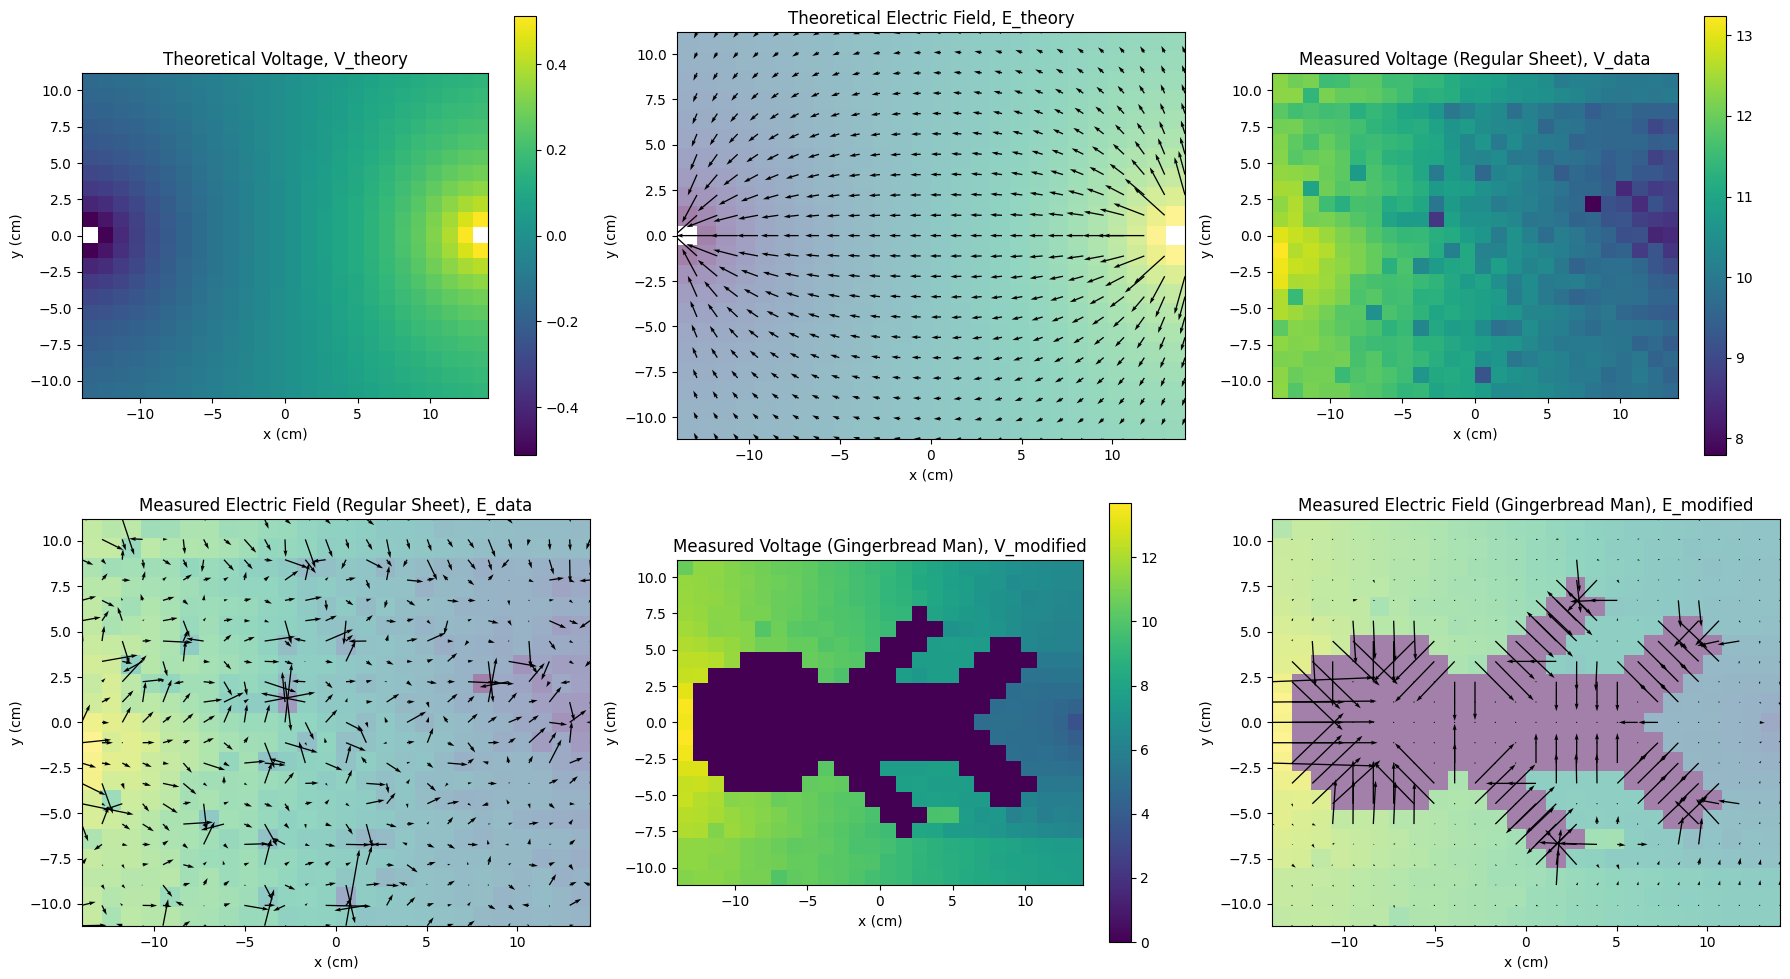

Plots have been saved to: /content/drive/MyDrive/VErho/plots


In [9]:
# Mount Google Drive and set up folder structure
from google.colab import drive
drive.mount('/content/drive')

import os
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define organized folder structure on Google Drive
base_folder = '/content/drive/MyDrive/VErho'
csv_folder = os.path.join(base_folder, 'csv')
plots_folder = os.path.join(base_folder, 'plots')
os.makedirs(csv_folder, exist_ok=True)
os.makedirs(plots_folder, exist_ok=True)

# --- CSV Loading ---
regular_data = """12.27	12.05	12.15	11.54	11.60	11.85	11.85	11.55	11.57	11.43	11.40	11.17	10.97	10.95	10.86	10.61	10.61	10.49	10.10	10.18	10.17	10.09	10.00	9.99	10.02	9.94
12.29	12.30	11.38	12.15	11.95	11.95	11.88	11.73	11.56	11.22	11.29	11.19	10.86	10.90	10.73	10.64	10.57	10.52	10.39	10.29	10.12	9.99	9.98	10.06	9.95	10.03
11.85	11.60	11.67	11.57	11.61	11.22	11.43	11.30	11.00	10.94	10.65	9.95	10.20	10.53	10.40	9.81	10.17	9.98	9.75	9.79	9.41	9.64	9.72	9.52	9.53	9.50
12.07	12.10	11.83	11.75	11.72	11.59	11.35	11.26	11.15	11.18	10.94	10.61	10.78	10.49	10.36	10.34	10.25	9.64	9.92	9.86	9.65	9.63	9.60	9.42	8.97	9.20
12.20	11.89	11.66	11.95	11.75	11.46	11.53	11.43	11.36	11.12	11.05	10.68	10.33	10.63	10.01	10.41	10.10	10.05	9.99	9.57	9.66	9.59	9.63	9.61	9.43	9.46
12.24	11.83	11.95	12.03	11.87	11.40	11.60	11.30	11.22	11.04	11.02	10.76	10.33	10.28	10.43	10.00	10.02	9.70	9.87	9.85	9.70	9.41	9.57	9.45	8.85	9.08
12.35	12.32	12.25	12.01	11.87	10.75	11.67	11.50	11.35	11.05	10.05	10.77	10.55	9.60	10.25	10.36	10.18	9.90	9.40	9.65	9.55	9.37	9.56	9.29	9.28	9.13
12.50	12.48	10.97	12.05	11.81	11.86	11.71	11.58	11.40	11.23	10.77	10.87	10.83	10.55	10.42	10.29	10.12	10.05	9.86	9.64	9.63	9.43	8.42	9.06	8.76	8.87
12.31	12.59	12.16	11.55	11.23	11.65	11.64	11.15	11.29	11.03	9.93	10.77	10.50	10.47	10.07	10.22	10.17	10.00	9.76	9.68	7.79	9.16	9.03	8.49	9.16	8.89
12.47	12.63	12.10	12.15	11.97	11.78	11.66	10.98	10.81	10.78	8.65	10.90	10.55	10.58	10.48	10.31	9.94	9.98	9.86	9.55	9.58	9.20	9.22	8.83	8.70	8.63
12.97	12.79	12.66	12.42	12.19	12.05	11.75	11.56	11.43	11.44	11.22	11.15	10.85	10.65	10.10	10.57	10.19	9.75	10.12	9.95	9.70	9.57	9.11	9.15	8.35	8.43
13.24	12.61	12.77	12.62	12.26	12.17	11.96	11.73	11.58	11.55	11.16	10.15	11.10	10.20	10.25	10.55	10.40	10.22	10.15	9.93	9.84	9.45	9.53	8.73	9.23	8.64
13.10	12.79	12.71	12.43	12.32	12.17	11.95	11.25	11.70	10.35	10.80	11.02	11.07	10.30	10.87	10.53	10.24	10.39	9.98	9.53	9.71	9.78	9.77	9.61	9.25	9.04
13.05	12.54	12.58	12.45	12.22	11.75	11.66	11.59	11.66	11.46	11.35	11.07	10.79	10.98	10.53	10.14	10.45	10.01	10.08	10.13	9.91	9.76	9.85	9.74	9.46	9.39
12.60	11.49	12.45	12.33	12.17	11.70	11.83	11.57	11.62	11.24	11.28	11.04	10.97	10.88	10.81	10.10	10.43	10.06	9.84	9.56	9.70	9.84	9.80	9.79	9.56	9.56
12.59	12.45	12.30	12.11	11.82	11.82	10.55	11.68	11.54	11.33	11.01	11.14	10.98	10.87	10.69	10.61	10.26	10.29	10.18	10.05	9.82	9.95	9.64	9.53	9.44	9.38
11.86	12.25	12.21	12.02	11.87	11.78	11.66	11.31	11.47	10.30	11.08	10.85	10.88	10.43	9.85	9.97	10.46	10.18	10.15	9.86	9.71	9.90	9.87	9.85	9.77	9.60
12.31	12.20	12.25	12.10	11.99	11.64	11.52	11.50	11.57	11.28	11.29	11.07	10.90	10.85	10.68	10.61	10.35	10.15	9.99	10.03	10.02	9.93	9.90	9.55	9.65	9.39
12.16	12.19	12.04	12.06	12.10	11.66	11.80	11.49	11.56	11.41	11.22	10.97	11.05	10.53	10.66	9.94	10.13	10.30	10.18	9.99	10.10	9.98	9.82	9.97	9.53	9.67
12.30	12.00	12.10	12.10	11.48	11.73	11.82	11.69	11.54	10.64	11.09	11.15	10.99	9.21	10.74	10.58	10.47	10.22	10.18	10.03	10.06	9.72	9.82	10.02	9.79	9.52
12.31	11.78	12.14	12.05	12.05	11.83	11.75	11.58	11.38	11.42	10.98	11.07	11.01	10.84	10.44	10.42	10.49	10.40	10.22	10.14	9.93	9.78	9.85	9.88	9.81	9.70"""

ginger_data = """10.50	11.35	11.36	11.14	10.92	10.79	10.54	10.46	10.28	9.98	9.82	9.55	9.34	9.14	8.81	8.43	8.09	7.86	7.41	7.43	7.14	6.94	6.74	6.62	6.54	6.55
11.54	11.48	11.32	11.18	11.04	10.84	10.68	10.49	10.28	10.05	9.91	9.63	9.42	9.07	8.84	8.32	8.18	7.74	7.67	7.24	7.15	6.64	6.74	6.65	6.43	6.45
11.61	11.49	11.40	11.22	11.02	10.83	10.57	10.49	10.25	10.10	9.84	9.65	9.44	9.07	8.91	8.54	8.15	7.82	7.61	7.22	7.04	6.86	6.42	6.56	6.33	6.31
11.62	11.55	11.25	11.25	10.97	10.94	10.57	10.45	10.27	9.99	9.91	9.76	9.51	9.14	9.06	0.00	8.01	7.73	7.46	7.31	7.05	6.78	6.48	6.44	6.26	6.29
11.81	11.63	11.22	11.29	11.20	10.06	10.68	10.22	10.07	10.12	9.95	9.80	9.56	9.34	0.00	0.00	0.00	6.97	7.27	7.30	7.11	6.70	6.41	6.24	6.14	6.13
12.08	11.95	11.76	11.54	11.23	10.79	10.81	10.45	10.44	9.99	10.13	9.94	9.58	0.00	0.00	0.00	7.70	7.72	7.63	7.54	0.00	0.00	6.40	6.16	6.12	6.06
12.33	12.36	12.15	11.61	0.00	0.00	0.00	0.00	10.50	10.36	10.22	10.07	0.00	0.00	0.00	7.69	7.64	7.69	7.65	0.00	0.00	0.00	0.00	5.65	5.63	5.59
12.52	12.53	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.17	9.90	0.00	0.00	0.00	7.63	7.30	7.66	7.63	0.00	0.00	0.00	0.00	5.20	5.24	5.32	5.30
13.13	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	5.06	4.96	4.95	4.96
13.57	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.97	4.99	4.97	4.80	4.64	4.38
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	4.88	5.07	5.04	4.91	4.78	4.48	3.47
13.70	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.03	4.95	4.94	4.83	4.51	4.16
13.38	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	0.00	5.02	4.96	5.03	4.77	4.62
12.96	12.96	0.00	0.00	0.00	0.00	0.00	0.00	0.00	10.19	0.00	0.00	0.00	7.68	7.62	7.69	7.77	7.76	0.00	0.00	0.00	0.00	5.15	5.13	5.09	5.00
12.51	12.58	12.32	0.00	0.00	0.00	0.00	0.00	10.39	10.47	10.34	0.00	0.00	0.00	7.80	7.82	7.70	7.68	7.68	0.00	0.00	0.00	0.00	5.52	5.47	5.46
12.54	12.15	12.02	11.23	11.24	11.14	10.64	10.67	10.54	10.32	10.16	10.16	0.00	0.00	0.00	7.71	7.82	7.77	7.56	7.57	0.00	0.00	6.17	5.94	5.84	5.84
12.24	12.14	11.93	11.56	11.35	11.21	11.00	10.70	10.52	10.36	10.20	10.05	9.76	0.00	0.00	0.00	9.75	9.81	7.62	7.23	7.29	6.06	6.44	5.86	6.15	6.01
12.08	11.99	11.08	11.65	11.42	11.09	10.90	10.77	10.47	10.26	10.07	9.89	9.64	9.43	0.00	8.22	8.10	7.53	7.57	7.42	7.16	6.90	6.69	6.55	6.38	6.22
11.41	11.38	11.32	11.23	10.97	10.85	10.61	10.37	10.42	10.34	10.13	9.75	9.77	9.58	9.21	9.03	8.82	8.51	8.49	8.33	8.11	8.00	7.81	7.70	7.59	7.53
11.38	11.39	11.21	11.19	10.96	10.82	10.73	10.47	10.46	10.21	10.14	9.96	9.93	9.41	9.31	8.95	8.82	8.62	8.48	8.27	8.02	7.97	7.87	7.74	7.68	7.62
11.17	11.27	11.25	11.11	10.91	10.90	9.96	10.35	10.46	10.24	10.12	9.93	9.59	9.38	9.30	8.92	8.86	8.60	8.42	8.32	8.14	8.02	7.88	7.78	7.74	7.68"""

# Read the data into DataFrames
df_regular_raw = pd.read_csv(io.StringIO(regular_data), sep='\t', header=None)
df_ginger_raw = pd.read_csv(io.StringIO(ginger_data), sep='\t', header=None)

# Flip vertically so that y increases upward (for physical coordinates)
V_regular = np.flipud(df_regular_raw.values)
V_ginger = np.flipud(df_ginger_raw.values)

# Determine grid size and compute scaling factor.
n_rows, n_cols = V_regular.shape
scale = 28 / (n_cols - 1)  # cm per grid step

# Compute new physical coordinates (x: -14 to 14 cm; y: based on same spacing)
x_coords = np.linspace(-14, 14, n_cols)
y_coords = np.linspace(-((n_rows-1)*scale)/2, ((n_rows-1)*scale)/2, n_rows)

# Reprocess and save CSV files with centered & rescaled coordinates.
# Create DataFrames with physical coordinate labels.
df_regular_centered = pd.DataFrame(V_regular, index=y_coords, columns=x_coords)
df_ginger_centered = pd.DataFrame(V_ginger, index=y_coords, columns=x_coords)

df_regular_centered.to_csv(os.path.join(csv_folder, 'regular_sheet_centered.csv'))
df_ginger_centered.to_csv(os.path.join(csv_folder, 'gingerbread_man_centered.csv'))
print("Centered CSV files have been saved to:", csv_folder)

# --- Data Processing & Plotting ---

# Create a meshgrid in physical coordinates.
X, Y = np.meshgrid(x_coords, y_coords)

# Theoretical model parameters (in physical units)
Q = 1.0            # charge per unit length (arbitrary)
epsilon0 = 1.0     # permittivity (arbitrary)
a = 14.0            # half-separation of rods (in cm)

# Compute theoretical voltage.
V_theory = (Q/(4*np.pi*epsilon0)) * np.log(((X + a)**2 + Y**2) / ((X - a)**2 + Y**2))

# Compute gradients with physical spacing.
Ey_theory, Ex_theory = np.gradient(V_theory, scale, scale)
Ex_theory = -Ex_theory
Ey_theory = -Ey_theory

# Compute gradients for measured data (using the physical spacing).
Ey_data, Ex_data = np.gradient(V_regular, scale, scale)
Ex_data = -Ex_data
Ey_data = -Ey_data

Ey_modified, Ex_modified = np.gradient(V_ginger, scale, scale)
Ex_modified = -Ex_modified
Ey_modified = -Ey_modified

# --- Plotting ---
# Update plot extents to the physical coordinate limits.
extent = [x_coords[0], x_coords[-1], y_coords[0], y_coords[-1]]

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Theoretical Voltage
im0 = axes[0,0].imshow(V_theory, origin='lower', extent=extent)
axes[0,0].set_title('Theoretical Voltage, V_theory')
axes[0,0].set_xlabel('x (cm)')
axes[0,0].set_ylabel('y (cm)')
fig.colorbar(im0, ax=axes[0,0])

# Theoretical Electric Field
axes[0,1].imshow(V_theory, origin='lower', extent=extent, alpha=0.5)
axes[0,1].quiver(X, Y, Ex_theory, Ey_theory, color='k')
axes[0,1].set_title('Theoretical Electric Field, E_theory')
axes[0,1].set_xlabel('x (cm)')
axes[0,1].set_ylabel('y (cm)')

# Data Voltage (regular sheet)
im2 = axes[0,2].imshow(V_regular, origin='lower', extent=extent)
axes[0,2].set_title('Measured Voltage (Regular Sheet), V_data')
axes[0,2].set_xlabel('x (cm)')
axes[0,2].set_ylabel('y (cm)')
fig.colorbar(im2, ax=axes[0,2])

# Data Electric Field (regular sheet)
axes[1,0].imshow(V_regular, origin='lower', extent=extent, alpha=0.5)
axes[1,0].quiver(X, Y, Ex_data, Ey_data, color='k')
axes[1,0].set_title('Measured Electric Field (Regular Sheet), E_data')
axes[1,0].set_xlabel('x (cm)')
axes[1,0].set_ylabel('y (cm)')

# Modified Voltage (gingerbread man)
im4 = axes[1,1].imshow(V_ginger, origin='lower', extent=extent)
axes[1,1].set_title('Measured Voltage (Gingerbread Man), V_modified')
axes[1,1].set_xlabel('x (cm)')
axes[1,1].set_ylabel('y (cm)')
fig.colorbar(im4, ax=axes[1,1])

# Modified Electric Field (gingerbread man)
axes[1,2].imshow(V_ginger, origin='lower', extent=extent, alpha=0.5)
axes[1,2].quiver(X, Y, Ex_modified, Ey_modified, color='k')
axes[1,2].set_title('Measured Electric Field (Gingerbread Man), E_modified')
axes[1,2].set_xlabel('x (cm)')
axes[1,2].set_ylabel('y (cm)')

plt.tight_layout()
plt.savefig(os.path.join(plots_folder, 'six_plots.png'))
plt.show()

print("Plots have been saved to:", plots_folder)


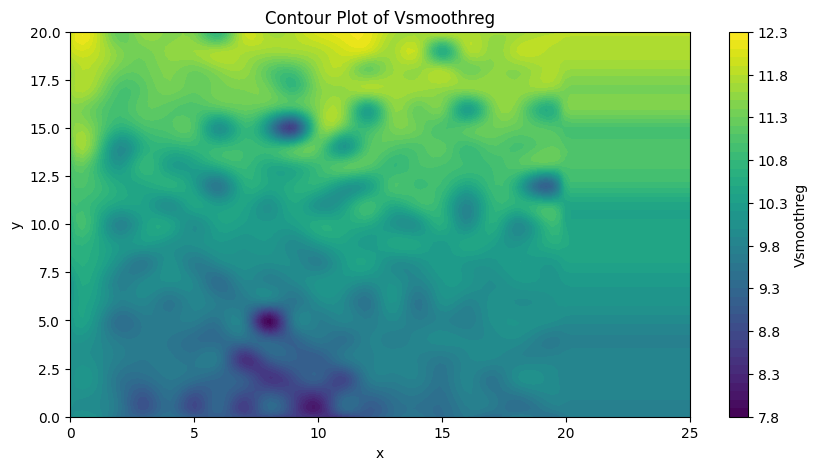

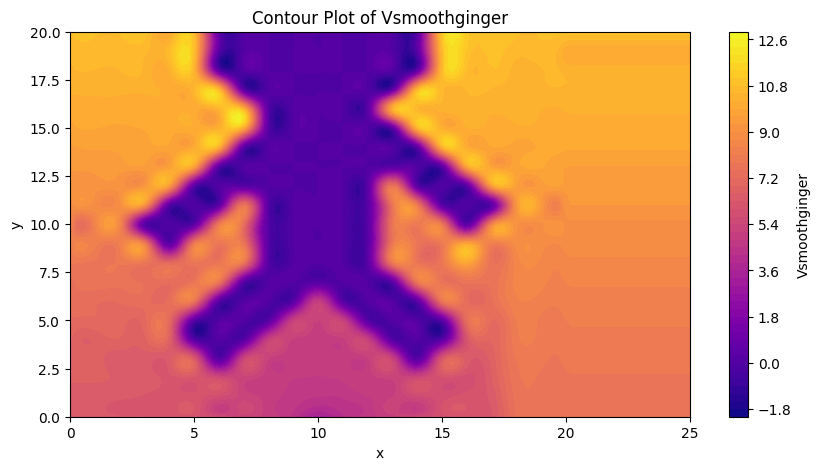

ValueError: Error code returned by bispev: 10

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Load the data
regular_data = pd.read_excel("/content/Regular.xlsx", header=None).values
ginger_data = pd.read_excel("/content/Gingerbread.xlsx", header=None).values

# Reverse and transpose the data
reg2 = np.flipud(regular_data.T)
ginger2 = np.flipud(ginger_data.T)

# Create interpolated functions
x = np.arange(reg2.shape[1])
y = np.arange(reg2.shape[0])
Vsmoothreg = RectBivariateSpline(y, x, reg2)
Vsmoothginger = RectBivariateSpline(y, x, ginger2)

# Compute electric field (gradient)
def electric_field(Vsmooth, x, y):
    Ex, Ey = np.gradient(-Vsmooth(y, x))
    return Ex, Ey

# Define grid for plotting
X, Y = np.meshgrid(np.linspace(0, 25, 100), np.linspace(0, 20, 100))

# Contour plots
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Vsmoothreg(Y[:, 0], X[0, :]), levels=50, cmap='viridis')
plt.colorbar(label='Vsmoothreg')
plt.title('Contour Plot of Vsmoothreg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Vsmoothginger(Y[:, 0], X[0, :]), levels=50, cmap='plasma')
plt.colorbar(label='Vsmoothginger')
plt.title('Contour Plot of Vsmoothginger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Stream plots
Ex_reg, Ey_reg = electric_field(Vsmoothreg, X, Y)
Ex_ginger, Ey_ginger = electric_field(Vsmoothginger, X, Y)

plt.figure(figsize=(10, 5))
plt.streamplot(X, Y, Ex_reg, Ey_reg, color='blue')
plt.title('Stream Plot of Esmoothreg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.streamplot(X, Y, Ex_ginger, Ey_ginger, color='red')
plt.title('Stream Plot of Esmoothginger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


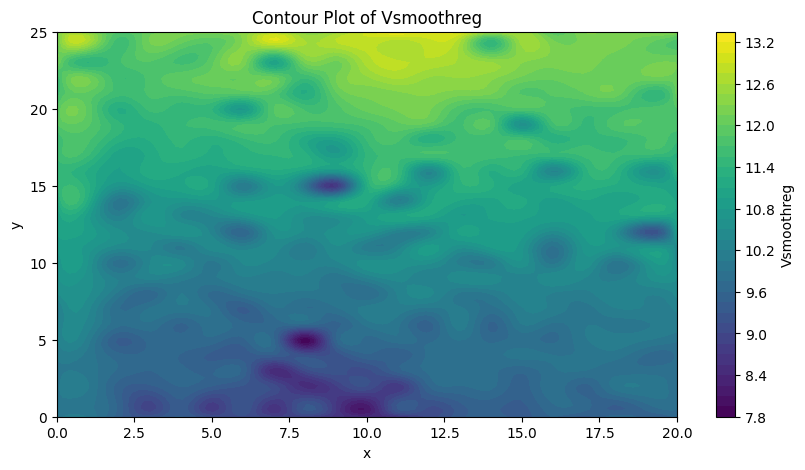

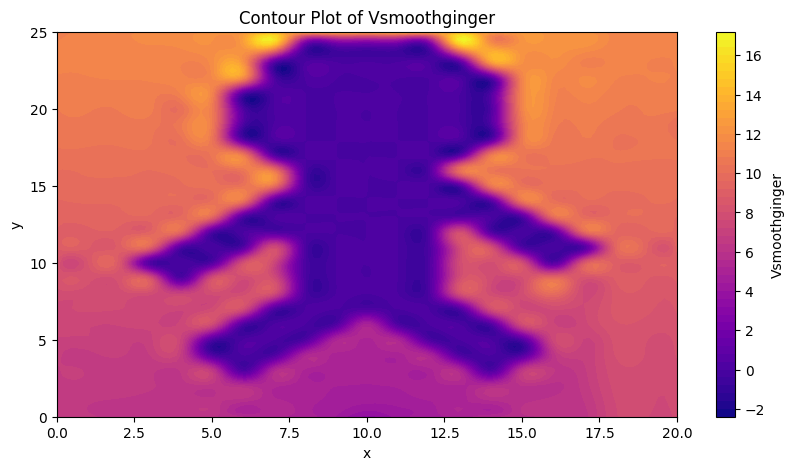

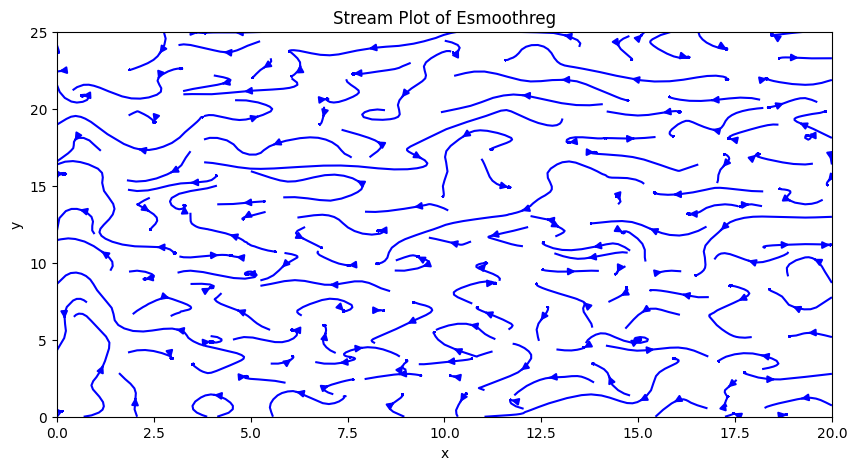

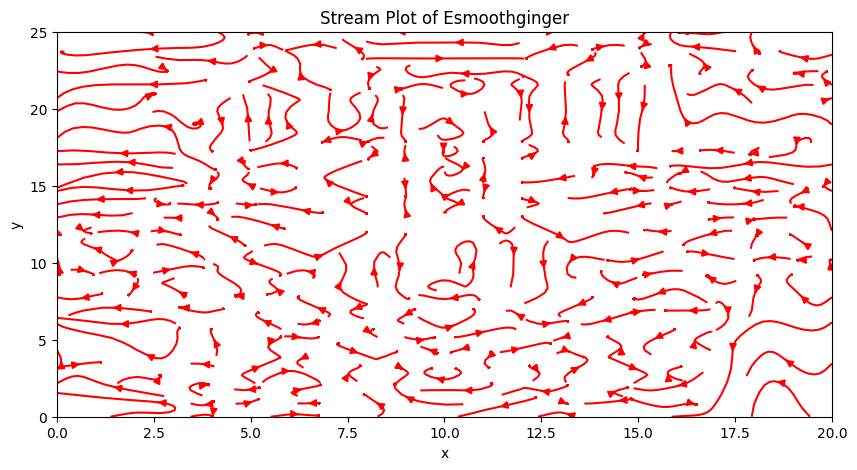

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

# Load the data
regular_data = pd.read_excel("/content/Regular.xlsx", header=None).values
ginger_data = pd.read_excel("/content/Gingerbread.xlsx", header=None).values

# Reverse and transpose the data
reg2 = np.flipud(regular_data.T)
ginger2 = np.flipud(ginger_data.T)

# Create interpolated functions
y_range, x_range = reg2.shape  # Get the shape
y_vals = np.linspace(0, y_range - 1, y_range)
x_vals = np.linspace(0, x_range - 1, x_range)

Vsmoothreg = RectBivariateSpline(y_vals, x_vals, reg2)
Vsmoothginger = RectBivariateSpline(y_vals, x_vals, ginger2)

# Define grid for plotting within the valid range
X, Y = np.meshgrid(np.linspace(0, x_range - 1, 100), np.linspace(0, y_range - 1, 100))

# Compute electric field (gradient)
def electric_field(Vsmooth, X, Y):
    Ex, Ey = np.gradient(-Vsmooth(Y[:, 0], X[0, :]), axis=(0, 1))
    return Ex, Ey

# Contour plots
plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Vsmoothreg(Y[:, 0], X[0, :]), levels=50, cmap='viridis')
plt.colorbar(label='Vsmoothreg')
plt.title('Contour Plot of Vsmoothreg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.contourf(X, Y, Vsmoothginger(Y[:, 0], X[0, :]), levels=50, cmap='plasma')
plt.colorbar(label='Vsmoothginger')
plt.title('Contour Plot of Vsmoothginger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Stream plots
Ex_reg, Ey_reg = electric_field(Vsmoothreg, X, Y)
Ex_ginger, Ey_ginger = electric_field(Vsmoothginger, X, Y)

plt.figure(figsize=(10, 5))
plt.streamplot(X, Y, Ex_reg, Ey_reg, color='blue')
plt.title('Stream Plot of Esmoothreg')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

plt.figure(figsize=(10, 5))
plt.streamplot(X, Y, Ex_ginger, Ey_ginger, color='red')
plt.title('Stream Plot of Esmoothginger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
